In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/19Nov/21/bengaluru_house_prices.csv')

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


To predict price based on the features - its not classification problem hence we have to use any algo based on continuos data like linear regression.

1. Deal null values
2. Make every column uniform
3. Outlier detection an removal
4. One hot encoding
5. Scaling


In [4]:
df.shape

(13320, 9)

### Examine area_type

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.groupby('area_type')

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Drop some columns

In [8]:
df1 = df.copy()

In [9]:
df2 = df.drop(['area_type', 'society', 'availability', 'balcony'], axis='columns')

In [10]:
df2.shape

(13320, 5)

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning

#### Dealing null values 

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Examine size column

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

We will create new column which will have only the room number ex-2,3 etc. This is done by using function

In [15]:
s = '2 bedroom'
print(s)

2 bedroom


In [16]:
type(s)

str

In [17]:
s.split(' ')

['2', 'bedroom']

In [18]:
s.split(' ')[0]

'2'

In [19]:
# using lambda func we split the 2 bedroom, 3 bhk etx and take the first part i.e number
df3['Newbhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df3.head()

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
df3.Newbhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
df3[df3.Newbhk>20]   #appears to be outlier

,location,size,total_sqft,bath,price,Newbhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Examine total_sqft

In [23]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see range here i.e 1133 - 1384. We can take their average. first find the variations so check if there are other than float using fucntion in the column

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df3[df3['total_sqft'].apply(is_float)].head(4)    #it will return rows with float total_sqft

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3


In [26]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,Newbhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [27]:
df4 = df3.copy()

In [28]:
#df3[df3['total_sqft']].apply(lambda x:int(x.split('-'))

def avearge(x):
    t = x.split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
#        return (int(t[0])+int(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
#df3[df3['total_sqft']].apply(avearge)

In [30]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                    4
price                 186
Newbhk                  4
Name: 30, dtype: object

In [31]:
avearge('345')

345.0

In [32]:
avearge('34.46Sq. Meter')

In [33]:
avearge('300-400')

350.0

In [34]:
df4['total_sqft'] = df4['total_sqft'].apply(avearge)

In [35]:
df4.head(4)

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [36]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
Newbhk                4
Name: 30, dtype: object

In [37]:
df4.shape

(13246, 6)

In [38]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
Newbhk              1
Name: 410, dtype: object

In [39]:
df4['total_sqft'].isnull().sum()

46

In [40]:
df5 = df4.dropna()

In [41]:
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
Newbhk        0
dtype: int64

## Feature Engineering

In [42]:
df5.head()

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Price per sq foot is very imp

In [43]:
#df55['pps'] = df5['price']*100000/df['total_sqft']
#df55.head()

#df5[["price", "total_sqft"]] = df5[["price", "total_sqft"]].apply(pd.to_numeric)

#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

In [44]:
df55 = df5.copy()

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   Newbhk      13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [46]:
df5.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
Newbhk          int64
dtype: object

In [47]:
df5.head()

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Examine location

In [48]:
df['location'].nunique()

1305

Location is categorical feature with 1305 with unique locations. Generally by one hot encoding we create dummy var, but not possible in this case.

Dimensionality Curse

We can drop location which occurs very less time like 1-2 etc.

In [49]:
loc_stat = df5.groupby('location')['location'].agg('count')
loc_stat 

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1298, dtype: int64

In [50]:
loc_stat = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stat 

location
Whitefield                              532
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          264
Thanisandra                             232
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1298, dtype: int64

We can set threshold and drop aprt from them

In [51]:
type(loc_stat )

pandas.core.series.Series

In [52]:
loc_stat[loc_stat<10]

location
Medahalli                               9
Ejipura                                 9
Chandra Layout                          9
Yemlur                                  9
Kaverappa Layout                        9
                                       ..
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
Kengeri Satellite Town KHB Apartment    1
 Anekal                                 1
Name: location, Length: 1045, dtype: int64

In [53]:
len(loc_stat[loc_stat<10])

1045

1045 locations have less than 10 data points and we can categories them as "other"

In [54]:
loc_10 = loc_stat[loc_stat<10]
loc_10

location
Medahalli                               9
Ejipura                                 9
Chandra Layout                          9
Yemlur                                  9
Kaverappa Layout                        9
                                       ..
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
Kengeri Satellite Town KHB Apartment    1
 Anekal                                 1
Name: location, Length: 1045, dtype: int64

In [55]:
len(df5.location.unique())

1298

In [56]:
df5.location = df5.location.apply(lambda x: "other" if x in loc_10 else x)
len(df5.location.unique())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


254

## Outlier Detection and Removal

In [57]:
df5.head()

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


 If we keep minimum size of 1 room as 300 sqft, then if we get total sqft as 1000 and 5 bhk, so each bhk has 200 sqft, whicih is unusal, so drop it

In [58]:
df5[df5.total_sqft/df5.Newbhk<300]      #outlier so remove them

,location,size,total_sqft,bath,price,Newbhk
9,other,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,other,8 Bedroom,1350.0,7.0,85.0,8
70,other,3 Bedroom,500.0,3.0,100.0,3
...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7
13279,other,6 Bedroom,1200.0,5.0,130.0,6
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5


In [59]:
df5.shape

(13200, 6)

In [60]:
# for dropping we can negate them

df6 = df5[~(df5.total_sqft/df5.Newbhk<300)]

In [61]:
df6.shape

(12456, 6)

In [62]:
df6.head()

,location,size,total_sqft,bath,price,Newbhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [63]:
df6['Newbhk'] = df6['Newbhk'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12456 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12456 non-null  object 
 1   size        12456 non-null  object 
 2   total_sqft  12456 non-null  float64
 3   bath        12456 non-null  float64
 4   price       12456 non-null  float64
 5   Newbhk      12456 non-null  float64
dtypes: float64(4), object(2)
memory usage: 681.2+ KB


#### Add new column price per unit sq ft

In [65]:
#df6["price_per_sq"] = (df6['Newbhk']*100000)/df['total_sqft']
#df6.head()
df7 = df6.copy()

In [66]:
df6['total_sqft'] = df6['total_sqft'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12456 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12456 non-null  object 
 1   size        12456 non-null  object 
 2   total_sqft  12456 non-null  float64
 3   bath        12456 non-null  float64
 4   price       12456 non-null  float64
 5   Newbhk      12456 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1001.2+ KB


In [70]:
df6["price_per_sq"] = (df6['price']*100000)/df6['total_sqft']
df6.head() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,Newbhk,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [71]:
df6.price_per_sq.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sq, dtype: float64

In [72]:
df6.shape

(12456, 7)

Here, for per foot min price is 267 and max is 17670. These are outlier. So we will use sd technique, in which we know from mean+1sd and mean-1sd, 68% of data will come. Delete data apart from that.Write a fucn for that, also it may vayr according to location

Write a func accorind to location, which calculate mean and sd and omit data which is above and below mean+-sd

def remove_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m  = np.mean(subdf.price_per_sq)
        sd = np.std(subdf.price_per_sq)
        #print(m-sd)
       # print(m+sd)
        reduced_df = subdf[(subdf.price_per_sq>(m-sd)) & (subdf.price_per_sq<=(m-sd))]
       # reduced_df1 = subdf[(subdf.price_per_sq>(m-sd))]
    #reduced_df2 = subdf[(subdf.price_per_sq<=(m-sd))]
     #   print("r",reduced_df1)
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        print(df_out)
    return df_out

df7 = remove_pps(df6)
df7.shape

In [73]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape


(10226, 7)

We removed close to 2000 outliers in price_per_sq

In [74]:
df7.head()

,location,size,total_sqft,bath,price,Newbhk,price_per_sq
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3.0,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509


### Now we are looking at houses with same area, but diff bedrooms and their prices

In [75]:
df7.head(5)

,location,size,total_sqft,bath,price,Newbhk,price_per_sq
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3.0,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509


In [76]:
bhk = df7[(df7.location=='Devarachikkanahalli') & (df7.Newbhk==2)]
bhk

,location,size,total_sqft,bath,price,Newbhk,price_per_sq


In [77]:
bhk = df7[(df7['location']=='Devarachikkanahalli') & (df7['Newbhk']==2)]
bhk

,location,size,total_sqft,bath,price,Newbhk,price_per_sq


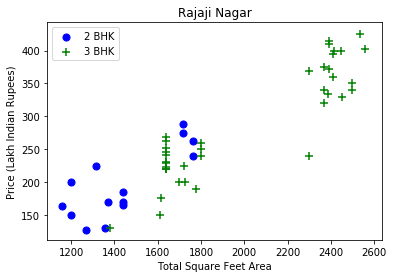

In [78]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.Newbhk==2)]
    bhk3 = df[(df.location==location) & (df.Newbhk==3)]
  #  matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

Here we can see, ex - for 1700 sq ft, we have both 2 and 3 bhk where price of 2bhk is higher. This is outlier

In [79]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for Newbhk, Newbhk_df in location_df.groupby('Newbhk'):
            bhk_stats[Newbhk] = {
                'mean': np.mean(Newbhk_df.price_per_sq),
                'std': np.std(Newbhk_df.price_per_sq),
                'count': Newbhk_df.shape[0]
            }
        for Newbhk, Newbhk_df in location_df.groupby('Newbhk'):
            stats = bhk_stats.get(Newbhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Newbhk_df[Newbhk_df.price_per_sq<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7380, 7)

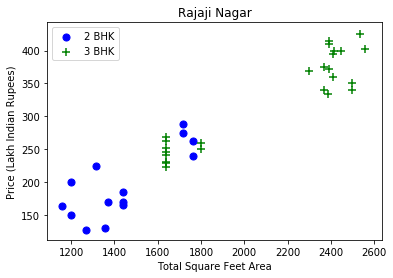

In [80]:
plot_scatter_chart(df8,"Rajaji Nagar")

### Want to see how many apartments in accordind to price per sq ft

Text(0, 0.5, 'count')

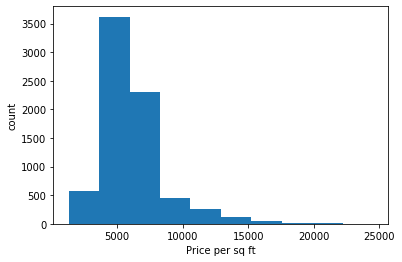

In [81]:
plt.hist(df8.price_per_sq)
plt.xlabel("Price per sq ft")
plt.ylabel("count")

Its kind of normal distrubution and mostly we have within 10k rs per sq ft.

### Examine bathroom

In [82]:
df8.head()

,location,size,total_sqft,bath,price,Newbhk,price_per_sq
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.654699


In [83]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,Newbhk,price_per_sq
597,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9.0,15151.515152
5338,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8537,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8623,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9327,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9643,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


If bathroom no. is higher than bedroom, drop them

Text(0, 0.5, 'count')

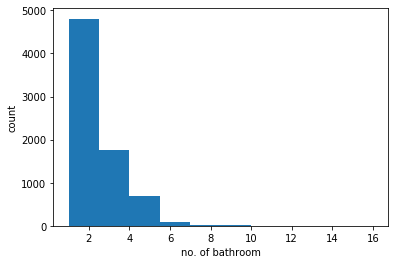

In [84]:
plt.hist(df8.bath)
plt.xlabel("no. of bathroom")
plt.ylabel("count")

In [85]:
df99 = df8.copy()

In [86]:
df8[(df8.bath>df8.Newbhk+2)]

,location,size,total_sqft,bath,price,Newbhk,price_per_sq
597,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9.0,15151.515152
1653,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5299,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6776,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8465,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [87]:
#if bathroom is greater than bedroom +2, remove them
df9 = df8[~(df8.bath>df8.Newbhk+2)]
df9.shape

(7375, 7)

In [88]:
df10 = df9.drop(['size'], axis=1)

## Data is clean now and we can start ML training

In [89]:
df10.head()

,location,total_sqft,bath,price,Newbhk,price_per_sq
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,4540.654699


In [90]:
df10.shape

(7375, 6)

Location is categorical, so use one hot encoding

In [91]:
d = pd.get_dummies(df10['location'])
d.head(2)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df11 = pd.concat([df10,d.drop('other', axis='columns')], axis='columns')
df11.head(2)

,location,total_sqft,bath,price,Newbhk,price_per_sq,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df12 = df11.drop(['location'], axis=1)
df12.head(3)

,total_sqft,bath,price,Newbhk,price_per_sq,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,3200.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,6916.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,3418.803419,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X = df12.drop('price', axis=1)
y = df12['price']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

## Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
yp1 = lm.predict(X_test)

In [99]:
yp1

array([131.87466169, 177.99601884,  54.27276905, ...,  80.14000779,
       163.58869373,  77.75140255])

In [100]:
lm.score(X_test, y_test)

0.9332257068137593

ShuffleSplit will randomize sample, so that each fold have equal sample. 

### Cross Validation

In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), X, y, cv=ss)

array([0.93322571, 0.94711004, 0.92078088, 0.93410952, 0.93727078])

## Grid Search CV

In [102]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [103]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.910011,{'normalize': False}
1,lasso,0.888297,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.915054,"{'criterion': 'mse', 'splitter': 'random'}"


# Decision tree performs the best

In [104]:
mdt = DecisionTreeRegressor()

In [105]:
mdt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [106]:
yp2 = mdt.predict(X_test)
yp2

array([120. , 125. ,  59. , ...,  79.9, 155. ,  75. ])

# Pickel

	PICKEL - Convert object(dict, list) into stream(file) - Read mode - dump method 
	Dump(object, filename)
	
Open(filename,mode)

In [107]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(mdt,f)

In [ ]:
path = r'C:\Users\User\Desktop\19Nov\21\house\banglore_home_prices_model.pickle'
pickle.dump(lm, open(path, 'wb'))

 We store columns as json

In [109]:
import json
columns =  {
    'data_columns' : [col.lower() for col in X.columns]
}
with open(r"C:\Users\User\Desktop\19Nov\21\house\columns.json",'w') as f:
    f.write(json.dumps(columns))

# Flask - backend for UI

Flask framework used for web application - Flask is backend language 

Flask is module which allows to write python service used to make http requests.